### Deliverable 3: Optimization of NN Model from 'AlphabetSoupCharity.ipynb'

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df["APPLICATION_TYPE"].value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

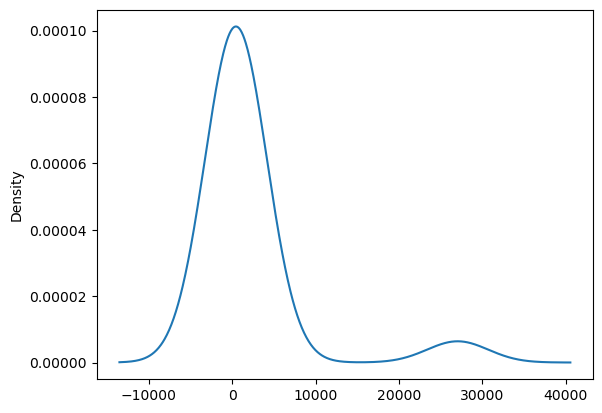

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 300].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

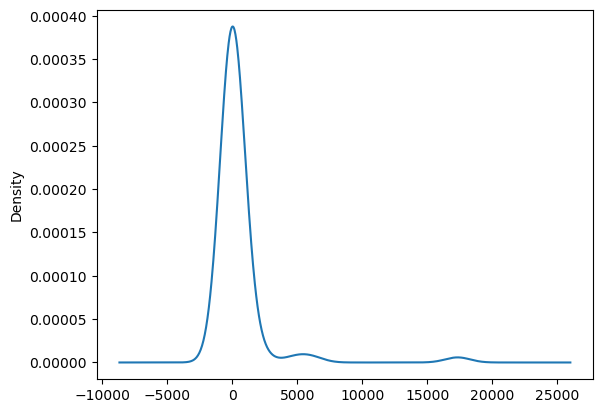

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.to_list()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop("IS_SUCCESSFUL", axis=1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
epoch_count = 200

### Model 1

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features * 2
hidden_nodes_layer3 = number_input_features

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features,activation='relu'))

# Second hidden layer
nn1.add(tf.keras.layers.LeakyReLU(alpha=0.3))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 86)                3784      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 86)                0         
                                                                 
 dense_1 (Dense)             (None, 43)                3741      
                                                                 
 dense_2 (Dense)             (None, 1)                 44        
                                                                 
Total params: 7,569
Trainable params: 7,569
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Import checkpoint dependencies
import os
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the checkpoint path and filenames
os.makedirs("checkpoints/opt1",exist_ok=True)
checkpoint_path = "checkpoints/opt1/weights.{epoch:02d}.hdf5"

In [19]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

es_callback = EarlyStopping(
    monitor="loss",
    patience= 5
)

In [20]:
# Train the model
fit_model1 = nn1.fit(X_train_scaled, y_train, epochs=epoch_count, callbacks=[cp_callback, es_callback])

Epoch 1/200
775/804 [===========================>..] - ETA: 0s - loss: 0.5676 - accuracy: 0.7226
Epoch 00001: saving model to checkpoints/opt1\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5666 - accuracy: 0.7237
Epoch 2/200
801/804 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7277
Epoch 00002: saving model to checkpoints/opt1\weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7276
Epoch 3/200
769/804 [===========================>..] - ETA: 0s - loss: 0.5529 - accuracy: 0.7284
Epoch 00003: saving model to checkpoints/opt1\weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7283
Epoch 4/200
801/804 [============================>.] - ETA: 0s - loss: 0.5504 - accuracy: 0.7318
Epoch 00004: saving model to checkpoints/opt1\weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5503 - accuracy: 0.7320
Epoch 5/

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5620 - accuracy: 0.7245 - 397ms/epoch - 1ms/step
Loss: 0.5619608759880066, Accuracy: 0.7245481014251709


<AxesSubplot:title={'center':'NN Model Opt 1 Loss'}>

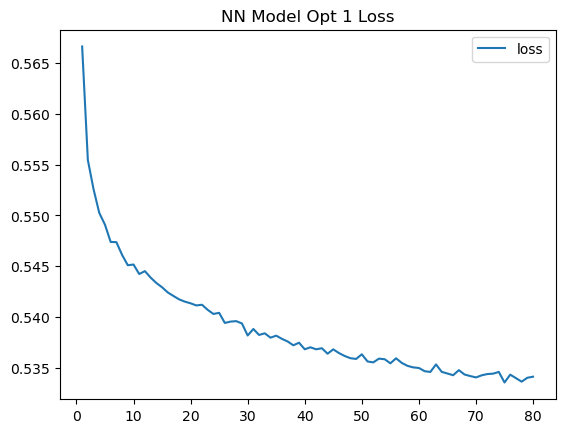

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model1.history, index=range(1,len(fit_model1.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss", title= "NN Model Opt 1 Loss")

<AxesSubplot:title={'center':'NN Model Opt 1 Accuracy'}>

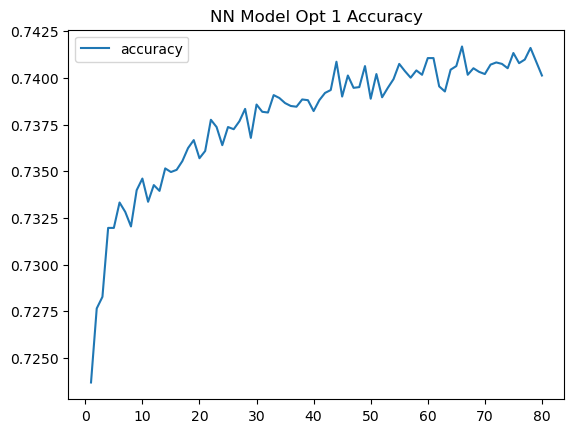

In [23]:
# Plot the loss
history_df.plot(y="accuracy", title= "NN Model Opt 1 Accuracy")

## Model 2

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 4

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features,activation='relu'))

# Second hidden layer
nn2.add(tf.keras.layers.LeakyReLU(alpha=0.3))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 86)                3784      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 86)                0         
                                                                 
 dense_4 (Dense)             (None, 172)               14964     
                                                                 
 dense_5 (Dense)             (None, 1)                 173       
                                                                 
Total params: 18,921
Trainable params: 18,921
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/opt2",exist_ok=True)
checkpoint_path = "checkpoints/opt2/weights.{epoch:02d}.hdf5"

In [27]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')


In [28]:
# Train the model
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=epoch_count, callbacks=[cp_callback, es_callback])

Epoch 1/200
790/804 [============================>.] - ETA: 0s - loss: 0.5711 - accuracy: 0.7239
Epoch 00001: saving model to checkpoints/opt2\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5712 - accuracy: 0.7235
Epoch 2/200
782/804 [============================>.] - ETA: 0s - loss: 0.5591 - accuracy: 0.7273
Epoch 00002: saving model to checkpoints/opt2\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5591 - accuracy: 0.7274
Epoch 3/200
784/804 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7293
Epoch 00003: saving model to checkpoints/opt2\weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7295
Epoch 4/200
783/804 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7311
Epoch 00004: saving model to checkpoints/opt2\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7309
Epoch 5/

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5609 - accuracy: 0.7230 - 363ms/epoch - 1ms/step
Loss: 0.5608693361282349, Accuracy: 0.7230320572853088


<AxesSubplot:title={'center':'NN Model Opt 2 Loss'}>

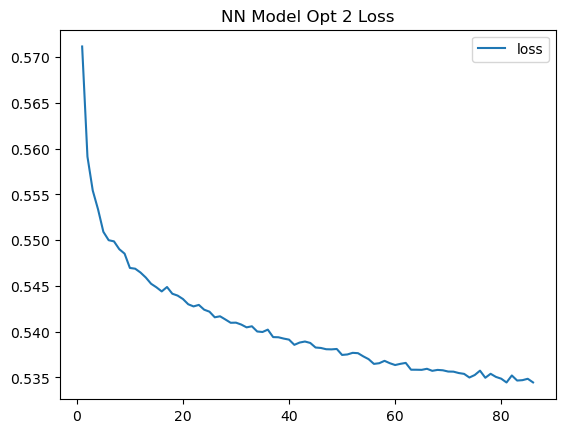

In [30]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model2.history, index=range(1,len(fit_model2.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss", title= "NN Model Opt 2 Loss")

<AxesSubplot:title={'center':'NN Model Opt 2 Accuracy'}>

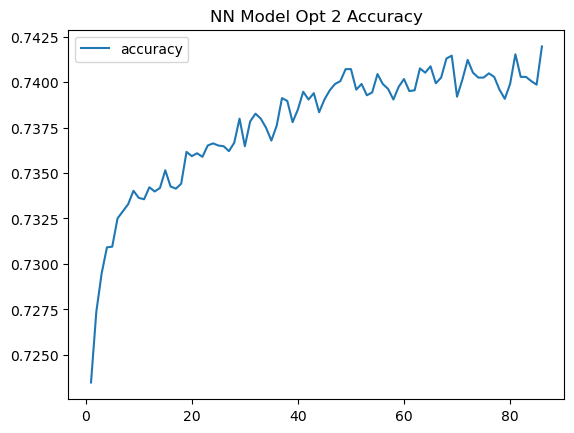

In [31]:
# Plot the loss
history_df.plot(y="accuracy", title= "NN Model Opt 2 Accuracy")

## Model 3


In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features * 5
hidden_nodes_layer3 = number_input_features * 4

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim= number_input_features,activation='relu'))

# Second hidden layer
nn3.add(tf.keras.layers.LeakyReLU(alpha=0.3))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 215)               9460      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 215)               0         
                                                                 
 dense_7 (Dense)             (None, 172)               37152     
                                                                 
 dense_8 (Dense)             (None, 1)                 173       
                                                                 
Total params: 46,785
Trainable params: 46,785
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/opt3",exist_ok=True)
checkpoint_path = "checkpoints/opt3/weights.{epoch:02d}.hdf5"

In [35]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')


In [36]:
# Train the model
fit_model3 = nn3.fit(X_train_scaled, y_train, epochs=epoch_count, callbacks=[cp_callback, es_callback])

Epoch 1/200
798/804 [============================>.] - ETA: 0s - loss: 0.5685 - accuracy: 0.7231
Epoch 00001: saving model to checkpoints/opt3\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5682 - accuracy: 0.7234
Epoch 2/200
796/804 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7311
Epoch 00002: saving model to checkpoints/opt3\weights.02.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7310
Epoch 3/200
799/804 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.7326
Epoch 00003: saving model to checkpoints/opt3\weights.03.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7325
Epoch 4/200
795/804 [============================>.] - ETA: 0s - loss: 0.5495 - accuracy: 0.7318
Epoch 00004: saving model to checkpoints/opt3\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7319
Epoch 5/

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9278 - accuracy: 0.7234 - 389ms/epoch - 1ms/step
Loss: 0.9277904629707336, Accuracy: 0.7233819365501404


<AxesSubplot:title={'center':'NN Model Opt 3 Loss'}>

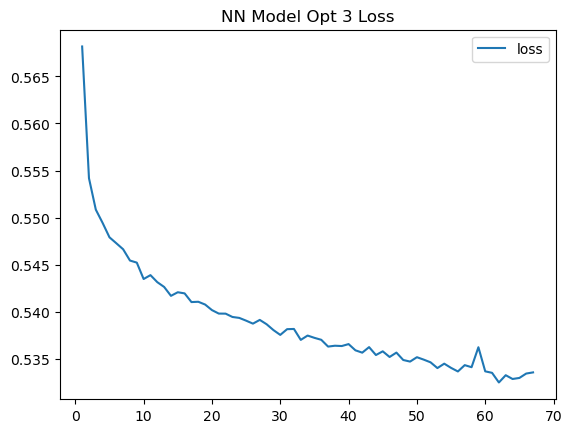

In [38]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model3.history, index=range(1,len(fit_model3.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss", title= "NN Model Opt 3 Loss")

<AxesSubplot:title={'center':'NN Model Opt 3 Accuracy'}>

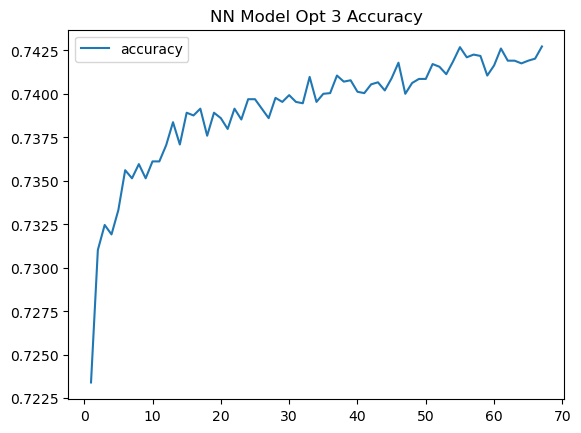

In [39]:
# Plot the loss
history_df.plot(y="accuracy", title= "NN Model Opt 3 Accuracy")

In [41]:
# create directory for saved models and save model
os.makedirs("saved_models/", exist_ok=True)
nn1.save('saved_models/AlphabetSoupCharity_Optimization.h5')